In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from scipy.ndimage import filters
import cv2

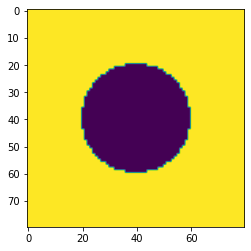

In [3]:
pad = 20
circle = cv2.imread("./kreis.png", 0)
I = np.zeros((circle.shape[0]+2*pad,circle.shape[1]+2*pad),dtype=np.uint8) + 255
I[pad:circle.shape[0]+pad, pad:circle.shape[1]+pad] = circle
I=I.astype(np.float32)
imshow(I)

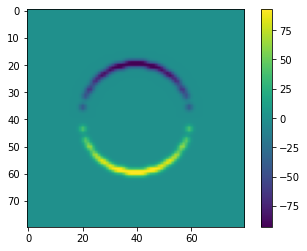

In [4]:
sigma = 1.0
imshow(filters.gaussian_filter(I.astype(np.float32), sigma, order=[1,0]))
colorbar()

(15.0, 65.0)

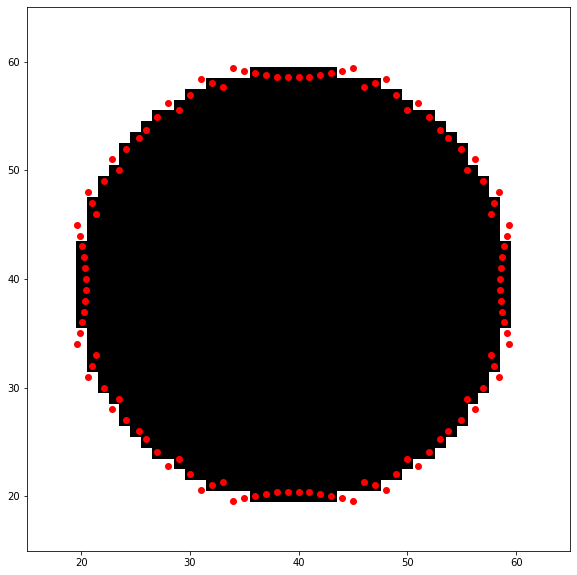

In [5]:
import new_detector as edge_detector
grads = edge_detector.image_gradient(I, 2.0)
edgels = edge_detector.compute_edge_points(grads)
xx = [e.x for e in edgels]
yy = [e.y for e in edgels]
figure(figsize=(10,10))
imshow(I, cmap=cm.gray)
plot(xx,yy, 'or', ms=4, mew=3)
xlim(15, 65)
ylim(15,65)

In [6]:
#g = I.copy()
#g = 255*np.ones_like(I)
#g[20,20] = 0
#g[10:13,10:40] = 0

g = cv2.imread("./zebra_1024.tif", 0)
g = cv2.resize(g, (256,256))
g = g[:,100:200]
imshow(g, cmap=cm.gray, vmin=0, vmax=255)

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:4045: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [7]:
import edge_detector
grads = edge_detector.image_gradient(g, 3.0)
imshow(np.sqrt(np.square(grads[0])+np.square(grads[1])))
colorbar()

RuntimeError: sequence argument must have length equal to input rank

In [8]:
edges = edge_detector.compute_edge_points(grads, 1)

In [9]:
links = edge_detector.chain_edge_points(edges, grads)

TypeError: Image data of dtype object cannot be converted to float

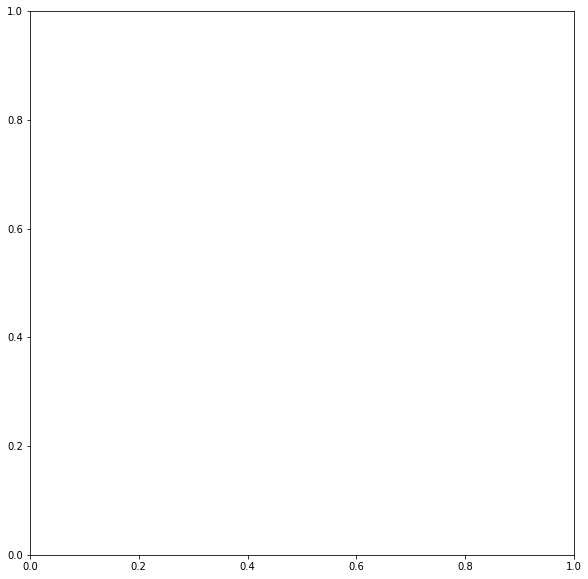

In [10]:
chains = edge_detector.thresholds_with_hysteresis(edges, links, grads, 1, 0.1)

figure(figsize=(10,10))
imshow(g, cmap=cm.gray)
for chain in chains:
    plot(chain[:,0], chain[:,1],'-')